<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Curvature_Invariants_2Qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 26.1 MB/s eta 0:00:00


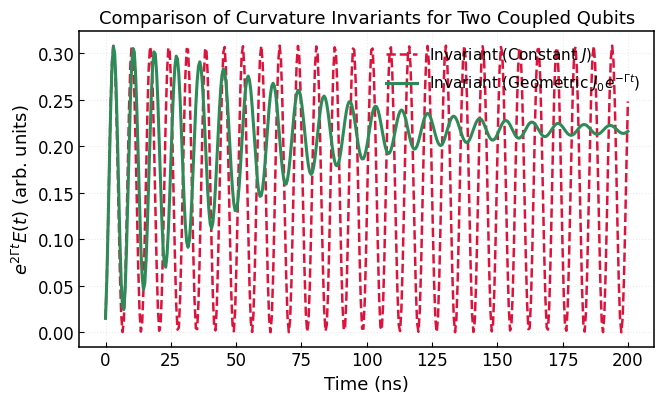

Relative variation (Constant J): 2.005e+00
Relative variation (Geometric J): 1.406e+00


In [2]:
# ===============================================================
#  Figure 1 – Comparison of Curvature Invariants for Two Qubits
#  Author: M. J. Pinheiro (concept) | Implementation: GPT-5
#  Output: figure1.png / figure1.pdf  (PRL-ready)
# ===============================================================
!pip install qutip
# --- Imports ----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# --- Parameters -------------------------------------------------
hbar   = 1.0
omega1 = 5.0 * 2 * np.pi     # GHz
omega2 = 5.1 * 2 * np.pi     # GHz
J0     = 0.05 * 2 * np.pi    # base coupling
Gamma  = 0.02                # decoherence rate (1/ns)
tlist  = np.linspace(0, 200, 400)   # time (ns)

# --- Operators --------------------------------------------------
sx, sy, sz, sp, sm = sigmax(), sigmay(), sigmaz(), sigmap(), sigmam()
I = qeye(2)
H0 = (hbar * omega1/2) * tensor(sz, I) + (hbar * omega2/2) * tensor(I, sz)
Hc = hbar * (tensor(sp, sm) + tensor(sm, sp))

# --- Coupling laws ----------------------------------------------
def J_const(t): return J0
def J_geom(t):  return J0 * np.exp(-Gamma * t)

# --- Time-dependent Hamiltonian --------------------------------
def H_geom_t(t, J_fun):
    return H0 + J_fun(t) * Hc - 1j * hbar * Gamma * tensor(I, I)

# --- Initial Bell-type state -----------------------------------
psi0 = (tensor(basis(2,0), basis(2,1)) + tensor(basis(2,1), basis(2,0))).unit()

# --- Runge–Kutta 4 Integrator ----------------------------------
def rk4_evolve(J_fun):
    psi = psi0
    dt = tlist[1] - tlist[0]
    states = []
    for t in tlist:
        Ht = H_geom_t(t, J_fun)
        k1 = (-1j / hbar) * Ht * psi
        k2 = (-1j / hbar) * H_geom_t(t + dt/2, J_fun) * (psi + k1 * dt/2)
        k3 = (-1j / hbar) * H_geom_t(t + dt/2, J_fun) * (psi + k2 * dt/2)
        k4 = (-1j / hbar) * H_geom_t(t + dt, J_fun) * (psi + k3 * dt)
        psi = psi + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
        states.append(psi)
    return states

# --- Evolutions -------------------------------------------------
states_const = rk4_evolve(J_const)
states_geom  = rk4_evolve(J_geom)

# --- Expectation values (non-normalized) -------------------------
E_const = np.array([(s.dag() * H0 * s).real for s in states_const])
E_geom  = np.array([(s.dag() * H0 * s).real for s in states_geom])
E_inv_const = np.exp(2*Gamma*tlist) * E_const
E_inv_geom  = np.exp(2*Gamma*tlist) * E_geom

# ===============================================================
#  Plot — PRL publication style
# ===============================================================
plt.figure(figsize=(6.8,4.2))
plt.rcParams.update({
    "font.size": 12,
    "font.family": "sans-serif",
    "axes.linewidth": 1.1,
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.direction": "in",
    "ytick.direction": "in"
})

plt.plot(tlist, E_inv_const, '--', color='crimson', lw=1.8,
         label=r'Invariant (Constant $J$)')
plt.plot(tlist, E_inv_geom,  '-', color='seagreen', lw=2.2,
         label=r'Invariant (Geometric $J_0 e^{-\Gamma t}$)')

plt.xlabel("Time (ns)")
plt.ylabel(r"$e^{2\Gamma t}E(t)$ (arb. units)")
plt.title(r"Comparison of Curvature Invariants for Two Coupled Qubits")
plt.legend(frameon=False, loc='upper right')
plt.grid(alpha=0.25, linestyle=':')
plt.tight_layout()

# --- Export high-quality figures -------------------------------
plt.savefig("figure1.png", dpi=600, bbox_inches='tight')
plt.savefig("figure1.pdf", bbox_inches='tight')
plt.show()

# --- Optional numerical diagnostic -----------------------------
var_const = (E_inv_const.max()-E_inv_const.min()) / abs(E_inv_const.mean())
var_geom  = (E_inv_geom.max() -E_inv_geom.min())  / abs(E_inv_geom.mean())
print(f"Relative variation (Constant J): {var_const:.3e}")
print(f"Relative variation (Geometric J): {var_geom:.3e}")
